<a href="https://colab.research.google.com/github/leviathan519/Swapsy/blob/main/Extracting_features_for_machine_learning_using_Gabor_filter_banks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
files.upload()

Saving download.jfif to download.jfif


{'download.jfif': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x0b\t\t\x07\t\t\x07\t\t\t\t\x0b\t\t\t\t\t\t\x0b\t\x0b\x0b\x0c\x0b\x0b\x0b\x0c\r\x10\x0c\x11\x0e\r\x0e\x0c\x12\x19\x12%\x1a\x1d%\x1d\x19\x1f\x1c))\x16%756\x1a*2>-)0\x19;!\x13\xff\xdb\x00C\x01\x07\x08\x08\x0b\t\x0b\x15\x0b\x0b\x15,\x1d\x19\x1d,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\xff\xc0\x00\x11\x08\x00\xb4\x01\x0c\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x00\x01\x04\x05\x06\x07\xff\xc4\x00@\x10\x00\x02\x02\x00\x05\x02\x04\x04\x04\x04\x03\x06\x06\x03\x00\x00\x01\x02\x03\x11\x00\x04\x12!1\x05A\x13"Qa\x062q\x81\x14#B\x91R\xa1\xc1\xf0\x153\xb1\x07$br\xd1\xe1CS\x82\x92\xa2\xf1\x164\xb2\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xc4\x00%\x11\x00\x02\x02\x02\x03\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x11\x

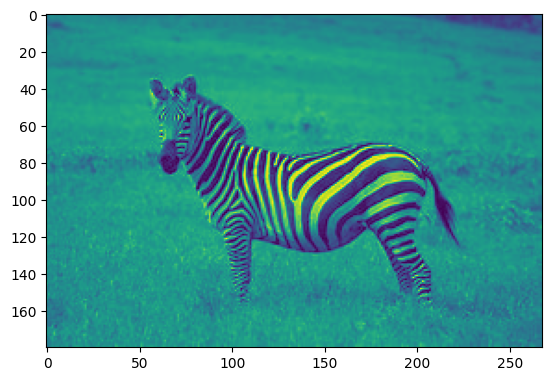

In [9]:
img = cv2.imread("download.jfif",1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)
#Here, if you have multichannel image then extract the right channel instead of converting the image to grey.
#For example, if DAPI contains nuclei information, extract the DAPI channel image first.

#Multiple images can be used for training. For that, you need to concatenate the data

#Save original image pixels into a data frame. This is our Feature #1.

In [11]:
#reshaping image for entering it as a feature in dataframe
img2=img.reshape(-1)
df = pd.DataFrame()
df["Original Image"] = img2

In [17]:
#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []  #Create empty list to hold all kernels that we will generate in a loop
#Now we iterate values of all the variables in kernel function so that wecan have different gabor filters
for theta in range(4):#Define number of thetas. Here only 2 theta values 0 and 1/4 . pi
 theta = (theta/4)*np.pi
 for sigma in(1,3,5):
  for lamda in np.arange(0,np.pi,np.pi/4):
    for gama in (0.05,0.225,0.5):
      for phi in (0.6,0.8):
        gabor_label = 'Gabor' + str(num)#Label Gabor columns as Gabor1, Gabor2, etc.
        ksize=5
        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gama, phi, ktype=cv2.CV_32F)
        kernles=kernels.append(kernel)
         #Now filter the image and add values to a new column
        fimg = cv2.filter2D(img,cv2.CV_8UC3,kernel)
        filtered_img = fimg.reshape(-1)

        cv2.imwrite('Pictures/gabor_filtered_images/'+gabor_label+'.jpg', filtered_img.reshape(img.shape))

        df[gabor_label] = filtered_img
        print(gabor_label,"sigma:",sigma,"theta:",theta,"lamda:",lamda,"gama:",gama,"phi",phi,)

        num+=1#increment for next column

print(df.head())



Gabor1 sigma: 1 theta: 0.0 lamda: 0.0 gama: 0.05 phi 0.6
Gabor2 sigma: 1 theta: 0.0 lamda: 0.0 gama: 0.05 phi 0.8
Gabor3 sigma: 1 theta: 0.0 lamda: 0.0 gama: 0.225 phi 0.6
Gabor4 sigma: 1 theta: 0.0 lamda: 0.0 gama: 0.225 phi 0.8
Gabor5 sigma: 1 theta: 0.0 lamda: 0.0 gama: 0.5 phi 0.6
Gabor6 sigma: 1 theta: 0.0 lamda: 0.0 gama: 0.5 phi 0.8
Gabor7 sigma: 1 theta: 0.0 lamda: 0.7853981633974483 gama: 0.05 phi 0.6
Gabor8 sigma: 1 theta: 0.0 lamda: 0.7853981633974483 gama: 0.05 phi 0.8
Gabor9 sigma: 1 theta: 0.0 lamda: 0.7853981633974483 gama: 0.225 phi 0.6
Gabor10 sigma: 1 theta: 0.0 lamda: 0.7853981633974483 gama: 0.225 phi 0.8
Gabor11 sigma: 1 theta: 0.0 lamda: 0.7853981633974483 gama: 0.5 phi 0.6
Gabor12 sigma: 1 theta: 0.0 lamda: 0.7853981633974483 gama: 0.5 phi 0.8
Gabor13 sigma: 1 theta: 0.0 lamda: 1.5707963267948966 gama: 0.05 phi 0.6
Gabor14 sigma: 1 theta: 0.0 lamda: 1.5707963267948966 gama: 0.05 phi 0.8
Gabor15 sigma: 1 theta: 0.0 lamda: 1.5707963267948966 gama: 0.225 phi 0.6
Gab

now this dataframe can be used to ml algorithms